In [1]:

"""
Análisis exploratorio de la Encuesta Mundial de Salud Escolar (EMSE 2018) – Argentina
Taller de Programación | Maestría en Finanzas – UBA | Primera exposición grupal

Este script realiza la limpieza, exploración y análisis descriptivo inicial de la base de microdatos
de la EMSE 2018, publicada por el Ministerio de Salud de la Nación.
El objetivo es comprender la estructura de la base, identificar variables relevantes
(asociadas a hábitos de salud, consumo de tabaco y alcohol, actividad física, alimentación, etc.)
y generar visualizaciones básicas para la presentación grupal del curso.

Estructura general:
1. Carga y detección de codificación del archivo CSV.
2. Corrección de caracteres mal decodificados.
3. Análisis de valores faltantes y filtrado de variables completas.
4. Integración con el libro de códigos para generar un diccionario de variables.
5. Construcción de un subconjunto temático (salud y hábitos).
6. Análisis descriptivo y visualizaciones.

Autores: Julián Delgadillo Marín, Alejandro Alcocer, Christian Campos
Fecha: 5 de Noviembre 2025
"""

# Subir el archivo al entorno de Colab (Base de datos)
from google.colab import files
uploaded = files.upload()

Saving EMSE_DatosAbiertos.csv to EMSE_DatosAbiertos.csv


In [2]:
# Cargar la base de datos
import pandas as pd

# Cargar el CSV (ajusta el nombre si es distinto)
df = pd.read_csv("EMSE_DatosAbiertos.csv", encoding='latin1')  # a veces 'utf-8' o 'latin1' según acentos

In [3]:
# Exploración inicial

# Ver las primeras filas
df.head()

# Dimensiones del dataset
print("Filas:", df.shape[0], "Columnas:", df.shape[1])

# Información general
df.info()

# Estadísticos básicos
df.describe(include='all').transpose().head(10)

Filas: 56981 Columnas: 309
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Columns: 309 entries, sitio to psu
dtypes: float64(154), int64(3), object(152)
memory usage: 134.3+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sitio,56981,1,AG,56981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
record,56981.0,NaN,NaN,NaN,28535.389832,16479.971553,1.0,14263.0,28522.0,42804.0,57095.0
q1,56873.0,NaN,NaN,NaN,4.905403,1.358115,1.0,4.0,5.0,6.0,8.0
texto_q1,56873,8,14 aÃ±os,12946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2,56445.0,NaN,NaN,NaN,1.520188,0.499597,1.0,1.0,2.0,2.0,2.0
texto_q2,56981,3,Femenino,29362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,55920.0,NaN,NaN,NaN,3.064485,1.324451,1.0,2.0,3.0,4.0,5.0
texto_q3,56981,6,2do aÃ±o/11vo grado nivel Polimodal o 4to aÃ±o...,13275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4,36052.0,NaN,NaN,NaN,1.642857,0.096898,1.2,1.57,1.64,1.7,2.03
q5,36052.0,NaN,NaN,NaN,60.212193,14.723909,27.0,51.0,58.0,66.0,187.0


In [7]:
# Ver las primeras columnas
df.columns[:30]

Index(['sitio', 'record', 'q1', 'texto_q1', 'q2', 'texto_q2', 'q3', 'texto_q3',
       'q4', 'q5', 'q6', 'texto_q6', 'q10', 'texto_q10', 'q15', 'texto_q15',
       'q16', 'texto_q16', 'q17', 'texto_q17', 'q18', 'texto_q18', 'q19',
       'texto_q19', 'q22', 'texto_q22', 'q23', 'texto_q23', 'q24',
       'texto_q24'],
      dtype='object')

In [8]:
# Examinar una muestra de respuestas textuales:
df[['texto_q1','texto_q2','texto_q3']].head(10)

,texto_q1,texto_q2,texto_q3
0,13 aÃ±os,Femenino,9no grado nivel Primario/Polimodal o 2do aÃ±o ...
1,13 aÃ±os,Femenino,9no grado nivel Primario/Polimodal o 2do aÃ±o ...
2,14 aÃ±os,Masculino,2do aÃ±o/11vo grado nivel Polimodal o 4to aÃ±o...
3,16 aÃ±os,Masculino,9no grado nivel Primario/Polimodal o 2do aÃ±o ...
4,13 aÃ±os,Femenino,9no grado nivel Primario/Polimodal o 2do aÃ±o ...
5,13 aÃ±os,Masculino,9no grado nivel Primario/Polimodal o 2do aÃ±o ...
6,14 aÃ±os,Femenino,2do aÃ±o/11vo grado nivel Polimodal o 4to aÃ±o...
7,12 aÃ±os,Femenino,2do aÃ±o/11vo grado nivel Polimodal o 4to aÃ±o...
8,13 aÃ±os,Masculino,2do aÃ±o/11vo grado nivel Polimodal o 4to aÃ±o...
9,14 aÃ±os,Femenino,9no grado nivel Primario/Polimodal o 2do aÃ±o ...


In [10]:
# Detectar encoding real
!pip install chardet
import chardet

with open("EMSE_DatosAbiertos.csv", 'rb') as f:
    result = chardet.detect(f.read(200000))
result


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [11]:
# Bloque para limpiar caracteres mal decodificados: Función para corregir los textos dañados
def fix_encoding(s):
    if isinstance(s, str):
        return s.encode('latin1', errors='ignore').decode('utf-8', errors='ignore')
    return s

# Aplicar la corrección a todas las columnas tipo texto
df = df.applymap(fix_encoding)

# Verificamos las tres primeras variables
df[['texto_q1', 'texto_q2', 'texto_q3']].head(10)


/tmp/ipython-input-2446341064.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(fix_encoding)


,texto_q1,texto_q2,texto_q3
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...
5,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...
6,14 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...
7,12 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...
8,13 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...
9,14 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...


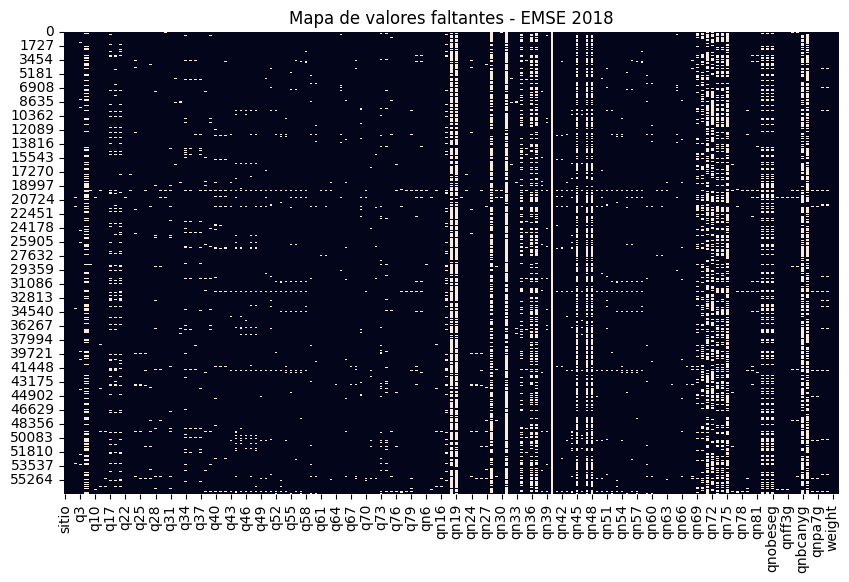

,0
qn40,56981
qn31,45631
qn18,42605
qn19,42231
qnc1g,37285
qnbcanyg,37246
qn48,36300
qn47,36241
qn45,36095
qn75,35407


In [4]:
# Paso 4 – Revisión de valores faltantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes - EMSE 2018")
plt.show()

# Conteo numérico de missing
df.isna().sum().sort_values(ascending=False).head(10)

In [13]:
#Cuantificar los faltantes más relevantes

df.isna().mean().sort_values(ascending=False).head(20)

,0
qn40,1.000000
qn31,0.800811
qn18,0.747705
qn19,0.741142
qnc1g,0.654341
qnbcanyg,0.653656
qn48,0.637054
qn47,0.636019
qn45,0.633457
qn75,0.621383


In [14]:
# Filtrar variables útiles (con pocos faltantes)

# Filtramos las columnas con menos del 20% de NaN
df_reducido = df.loc[:, df.isna().mean() < 0.2]
print("Columnas retenidas:", df_reducido.shape[1])

Columnas retenidas: 285


In [15]:
# # Subir el archivo al entorno de Colab (Libro de códigos)

from google.colab import files
uploaded = files.upload()

Saving libro-de-codigos-emse-2018.xlsx to libro-de-codigos-emse-2018.xlsx


In [18]:
# Cargar el archivo y mirar su estructura
import pandas as pd

codigos = pd.read_excel("libro-de-codigos-emse-2018.xlsx")
codigos.head(30)

,Código variable standard,Código variable ARG (Nº de pregunta),Pregunta,Códigos de respuesta,Etiquetas de respuesta
0,site,NaN,Lugar,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,record,NaN,Nº de registro,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,q1,q1,¿Qué edad tienes?,NaN,NaN
5,NaN,NaN,NaN,1.0,11 años o menos
6,NaN,NaN,NaN,2.0,12 años
7,NaN,NaN,NaN,3.0,13 años
8,NaN,NaN,NaN,4.0,14 años
9,NaN,NaN,NaN,5.0,15 años


In [17]:
# 3️Verificar los nombres de las columnas

codigos.columns

Index(['Código variable standard', 'Código variable ARG (Nº de pregunta)',
       'Pregunta', 'Códigos de respuesta', 'Etiquetas de respuesta'],
      dtype='object')

In [20]:
# Ver los nombres de columnas tal cual están
codigos.columns.tolist()

['Código variable standard',
 'Código variable ARG (Nº de pregunta)',
 'Pregunta',
 'Códigos de respuesta',
 'Etiquetas de respuesta']

In [22]:
# Buscar columnas que contengan la palabra “pregunta”
[c for c in codigos.columns if "preg" in c.lower()]

['Código variable ARG (Nº de pregunta)', 'Pregunta']

In [23]:
# Usar ese nombre automáticamente (sin tener que escribirlo)

# Buscar la columna que contenga la palabra 'pregunta'
col_preg = [c for c in codigos.columns if "preg" in c.lower()][0]
print("Nombre detectado de la columna:", col_preg)

# Extraer los nombres de variables desde esa columna
nombres_vars = codigos[col_preg].dropna().unique().tolist()

print("Total de variables:", len(nombres_vars))
print("Primeros 20 nombres:", nombres_vars[:20])

Nombre detectado de la columna: Código variable ARG (Nº de pregunta)
Total de variables: 72
Primeros 20 nombres: ['q1', 'q2', 'q3', 'q6', 'q7', 'q8', 'q12', 'q18', 'q19', 'q15', 'q16', 'q17', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34']


In [24]:
# Comparar variables del libro con las columnas del dataset
vars_existentes = [v for v in nombres_vars if v in df.columns]

print("Variables del libro presentes en la base:", len(vars_existentes))
print(vars_existentes)

Variables del libro presentes en la base: 63
['q1', 'q2', 'q3', 'q6', 'q18', 'q19', 'q15', 'q16', 'q17', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38', 'q39', 'q40', 'q41', 'q42', 'q47', 'q48', 'q50', 'q51', 'q52', 'q53', 'q55', 'q56', 'q57', 'q58', 'q59', 'q61', 'q62', 'q63', 'q64', 'q65', 'q66', 'q67', 'q68', 'q69', 'q70', 'q4', 'q5', 'q10', 'q22', 'q23', 'q24', 'q25', 'q26', 'q43', 'q44', 'q45', 'q46', 'q49', 'q54', 'q60', 'q71', 'q72']


In [32]:
# Detección y extracción de preguntas (para Excel)
import pandas as pd

# 1. Cargar el libro de códigos completo
# (read_excel no tiene skip_blank_lines, así que simplemente cargamos todo)
codigos_raw = pd.read_excel("libro-de-codigos-emse-2018.xlsx", header=0)

print("Columnas detectadas en el archivo:")
print(codigos_raw.columns.tolist())

# 2. Detectar automáticamente la columna que contiene las preguntas
col_pregunta = None
for col in codigos_raw.columns:
    ejemplos = codigos_raw[col].dropna().astype(str).head(15)
    if any("?" in e for e in ejemplos):  # detectar signos de pregunta
        col_pregunta = col
        break

if col_pregunta:
    print(f"\nColumna detectada como 'Pregunta': {col_pregunta}")
else:
    print("\nNo se encontró columna con texto de pregunta. Verificar manualmente los encabezados.")

# 3. Detectar la columna de los códigos de variable (q1, q2, etc.)
# Buscar columnas que contengan 'arg', 'preg' o 'variable'
col_codigo = [c for c in codigos_raw.columns if any(x in c.lower() for x in ["arg", "preg", "variable"])][0]
print(f"Columna detectada como 'Código de variable': {col_codigo}")

# 4. Filtrar solo las filas que contienen tanto el código como el texto de pregunta
codigos_filtrado = codigos_raw[[col_codigo, col_pregunta]].dropna()

# 5. Renombrar columnas para mayor claridad
codigos_filtrado.columns = ["Variable", "Descripcion"]

# 6. Limpiar duplicados y espacios en blanco
codigos_filtrado = codigos_filtrado.drop_duplicates().reset_index(drop=True)
codigos_filtrado["Variable"] = codigos_filtrado["Variable"].astype(str).str.strip()
codigos_filtrado["Descripcion"] = codigos_filtrado["Descripcion"].astype(str).str.strip()

# 7. Mostrar un resumen del diccionario generado
print(f"\nDiccionario limpio generado: {codigos_filtrado.shape[0]} variables encontradas\n")
display(codigos_filtrado.head(30))

Columnas detectadas en el archivo:
['Código variable standard', 'Código variable ARG (Nº de pregunta)', 'Pregunta', 'Códigos de respuesta', 'Etiquetas de respuesta']

Columna detectada como 'Pregunta': Pregunta
Columna detectada como 'Código de variable': Código variable standard

Diccionario limpio generado: 158 variables encontradas



,Variable,Descripcion
0,site,Lugar
1,record,Nº de registro
2,q1,¿Qué edad tienes?
3,q2,¿Cuál es tu sexo?
4,q3,¿En qué grado o año estás?
5,q4,"¿Cuál es tu estatura, sin zapatos? (Nota: dato..."
6,q5,"¿Cuánto pesas, sin zapatos? (Nota: dato en ki..."
7,q6,Durante los últimos 30 días ¿con qué frecuenci...
8,q10,"Durante los últimos 7 días, ¿cuántos días comi..."
9,q15,"Durante los últimos 12 meses, Cuantas veces fu..."


In [37]:
# Bloque para unir el libro de códigos con la base de datos

# 1. Tomar las variables que realmente están presentes en el DataFrame principal
vars_existentes = [v for v in codigos_filtrado["Variable"] if v in df.columns]

print(f"Variables presentes en la base: {len(vars_existentes)}")

# 2. Filtrar el diccionario original para conservar solo las variables existentes
diccionario_final = codigos_filtrado[codigos_filtrado["Variable"].isin(vars_existentes)].reset_index(drop=True)

# 3. Mostrar un resumen de las variables activas
print(f"\nDiccionario final de variables activas: {diccionario_final.shape[0]} variables encontradas\n")
display(diccionario_final.head(15))

Variables presentes en la base: 157

Diccionario final de variables activas: 157 variables encontradas



,Variable,Descripcion
0,record,Nº de registro
1,q1,¿Qué edad tienes?
2,q2,¿Cuál es tu sexo?
3,q3,¿En qué grado o año estás?
4,q4,"¿Cuál es tu estatura, sin zapatos? (Nota: dato..."
5,q5,"¿Cuánto pesas, sin zapatos? (Nota: dato en ki..."
6,q6,Durante los últimos 30 días ¿con qué frecuenci...
7,q10,"Durante los últimos 7 días, ¿cuántos días comi..."
8,q15,"Durante los últimos 12 meses, Cuantas veces fu..."
9,q16,"Durante los últimos 12 meses, ¿cuántas veces p..."


In [36]:
# Bloque sugerido de código para explorarlas todas
pd.set_option('display.max_rows', None)
display(diccionario_final[['Variable', 'Descripcion']])

,Variable,Descripcion
0,record,Nº de registro
1,q1,¿Qué edad tienes?
2,q2,¿Cuál es tu sexo?
3,q3,¿En qué grado o año estás?
4,q4,"¿Cuál es tu estatura, sin zapatos? (Nota: dato..."
5,q5,"¿Cuánto pesas, sin zapatos? (Nota: dato en ki..."
6,q6,Durante los últimos 30 días ¿con qué frecuenci...
7,q10,"Durante los últimos 7 días, ¿cuántos días comi..."
8,q15,"Durante los últimos 12 meses, Cuantas veces fu..."
9,q16,"Durante los últimos 12 meses, ¿cuántas veces p..."


In [40]:
# Crear en Colab un subconjunto con esas variables y renombrarlas:

vars_finales = ['q1','texto_q1','q2','texto_q2','q3','texto_q3','q6','texto_q6',
                'q10','texto_q10','q15','texto_q15','q22','texto_q22',
                'q27','texto_q27','q35','texto_q35','q59','texto_q59']

sub_df = df[vars_finales].copy()

# Renombrar columnas para análisis legible
sub_df = sub_df.rename(columns={
    'texto_q1':'Edad',
    'texto_q2':'Sexo',
    'texto_q3':'Grado',
    'texto_q6':'Actividad_fisica',
    'texto_q10':'Consumo_frutas',
    'texto_q15':'Lesiones',
    'texto_q22':'Tabaco',
    'texto_q27':'Amigos_cercanos',
    'texto_q35':'Alcohol',
    'texto_q59':'Educacion_padres'
})

# Verificar estructura del DataFrame nuevo
sub_df.info()
# Verificar los nombres de las columnas
sub_df.columns.tolist()
# Mostrar una muestra aleatoria
sub_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   q1                56873 non-null  float64
 1   Edad              56873 non-null  object 
 2   q2                56445 non-null  float64
 3   Sexo              56981 non-null  object 
 4   q3                55920 non-null  float64
 5   Grado             56981 non-null  object 
 6   q6                56482 non-null  float64
 7   Actividad_fisica  56981 non-null  object 
 8   q10               56771 non-null  float64
 9   Consumo_frutas    56981 non-null  object 
 10  q15               56741 non-null  float64
 11  Lesiones          56981 non-null  object 
 12  q22               56615 non-null  float64
 13  Tabaco            56981 non-null  object 
 14  q27               55905 non-null  float64
 15  Amigos_cercanos   56981 non-null  object 
 16  q35               54838 non-null  float6

,q1,Edad,q2,Sexo,q3,Grado,q6,Actividad_fisica,q10,Consumo_frutas,q15,Lesiones,q22,Tabaco,q27,Amigos_cercanos,q35,Alcohol,q59,Educacion_padres
50014,4.0,14 años,2.0,Femenino,4.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.0,Nunca,2.0,1 día,1.0,Ninguna,1.0,Nunca,4.0,3 o más,1.0,0 días,NaN,Dato perdido
49420,3.0,13 años,1.0,Masculino,1.0,8vo grado nivel Primario/Polimodal o 1er año ...,1.0,Nunca,4.0,3 días,1.0,Ninguna,2.0,Rara vez,4.0,3 o más,1.0,0 días,2.0,Primaria completa
39363,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,1.0,Nunca,1.0,0 días,1.0,Ninguna,4.0,Casi siempre,1.0,0,1.0,0 días,3.0,Secundario incompleto
51817,3.0,13 años,1.0,Masculino,1.0,8vo grado nivel Primario/Polimodal o 1er año ...,2.0,Rara vez,1.0,0 días,8.0,12 o más veces,3.0,Algunas veces,4.0,3 o más,1.0,0 días,3.0,Secundario incompleto
23548,4.0,14 años,1.0,Masculino,3.0,1er año/10mo grado nivel Polimodal o 3er año n...,1.0,Nunca,1.0,0 días,1.0,Ninguna,4.0,Casi siempre,1.0,0,1.0,0 días,6.0,Terciario/Universitario completo


In [41]:
# Trabajar sólo con las columnas textuales
cols_textuales = ['Edad', 'Sexo', 'Grado', 'Actividad_fisica',
                  'Consumo_frutas', 'Lesiones', 'Tabaco',
                  'Amigos_cercanos', 'Alcohol', 'Educacion_padres']

df_analisis = sub_df[cols_textuales].copy()
df_analisis.head()

,Edad,Sexo,Grado,Actividad_fisica,Consumo_frutas,Lesiones,Tabaco,Amigos_cercanos,Alcohol,Educacion_padres
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,Rara vez,0 días,Ninguna,Siempre,2,Los 30 días,Terciario/Universitario completo
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,Nunca,0 días,Ninguna,Nunca,3 o más,0 días,Secundario incompleto
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,Nunca,0 días,Ninguna,Nunca,3 o más,0 días,Secundario completo
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,Nunca,3 días,Ninguna,Nunca,3 o más,1 o 2 días,Secundario incompleto
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,Nunca,0 días,Ninguna,Rara vez,3 o más,0 días,Primaria completa


Resumen general de las variables categóricas:

Edad: 8 categorías | 0.2% valores faltantes
Moda: 14 años
--------------------------------------------------
Sexo: 3 categorías | 0.0% valores faltantes
Moda: Femenino
--------------------------------------------------
Grado: 6 categorías | 0.0% valores faltantes
Moda: 2do año/11vo grado nivel Polimodal o 4to año nivel Secundario
--------------------------------------------------
Actividad_fisica: 6 categorías | 0.0% valores faltantes
Moda: Nunca
--------------------------------------------------
Consumo_frutas: 9 categorías | 0.0% valores faltantes
Moda: 0 días
--------------------------------------------------
Lesiones: 9 categorías | 0.0% valores faltantes
Moda: Ninguna
--------------------------------------------------
Tabaco: 6 categorías | 0.0% valores faltantes
Moda: Nunca
--------------------------------------------------
Amigos_cercanos: 5 categorías | 0.0% valores faltantes
Moda: 3 o más
------------------------------------------

/tmp/ipython-input-1266514401.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette="pastel")


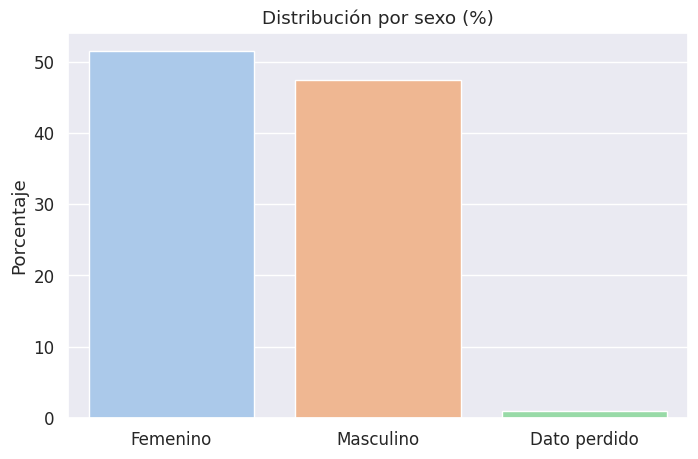

/tmp/ipython-input-1266514401.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edad_counts.index, y=edad_counts.values, palette="crest")


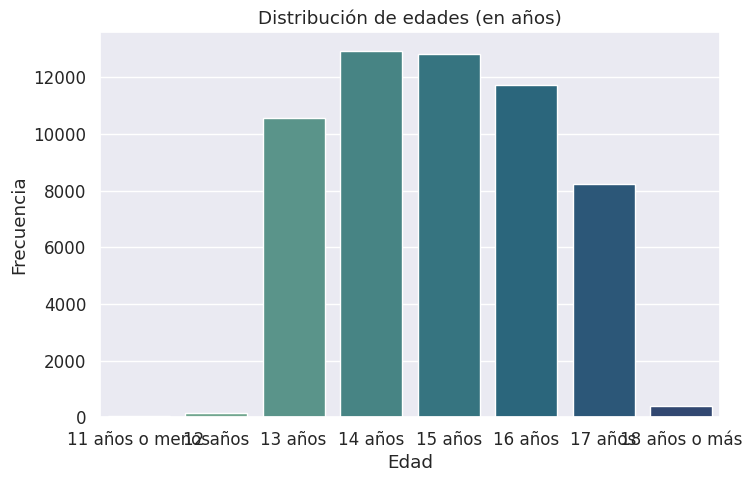

/tmp/ipython-input-1266514401.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=edu_counts.index, x=edu_counts.values, palette="flare")


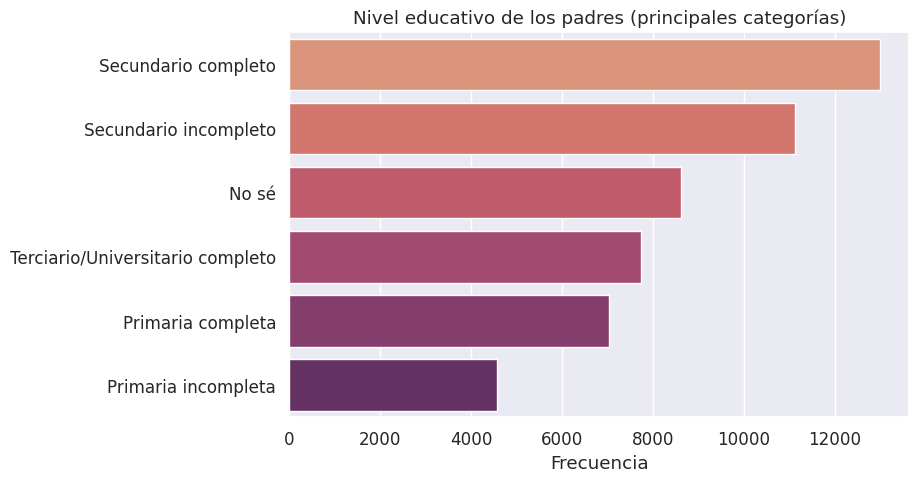

/tmp/ipython-input-1266514401.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analisis, y='Actividad_fisica', order=df_analisis['Actividad_fisica'].value_counts().index, ax=axes[0], palette="Blues_r")
/tmp/ipython-input-1266514401.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analisis, y='Consumo_frutas', order=df_analisis['Consumo_frutas'].value_counts().index, ax=axes[1], palette="Greens_r")


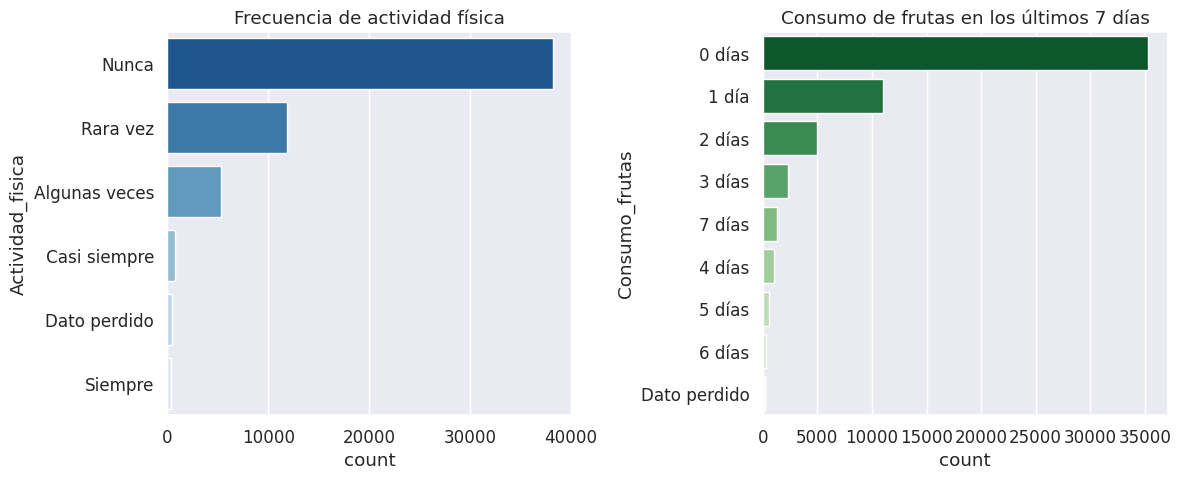

/tmp/ipython-input-1266514401.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analisis, y='Tabaco', order=df_analisis['Tabaco'].value_counts().index, ax=axes[0], palette="Reds_r")
/tmp/ipython-input-1266514401.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_analisis, y='Alcohol', order=df_analisis['Alcohol'].value_counts().index, ax=axes[1], palette="Oranges_r")


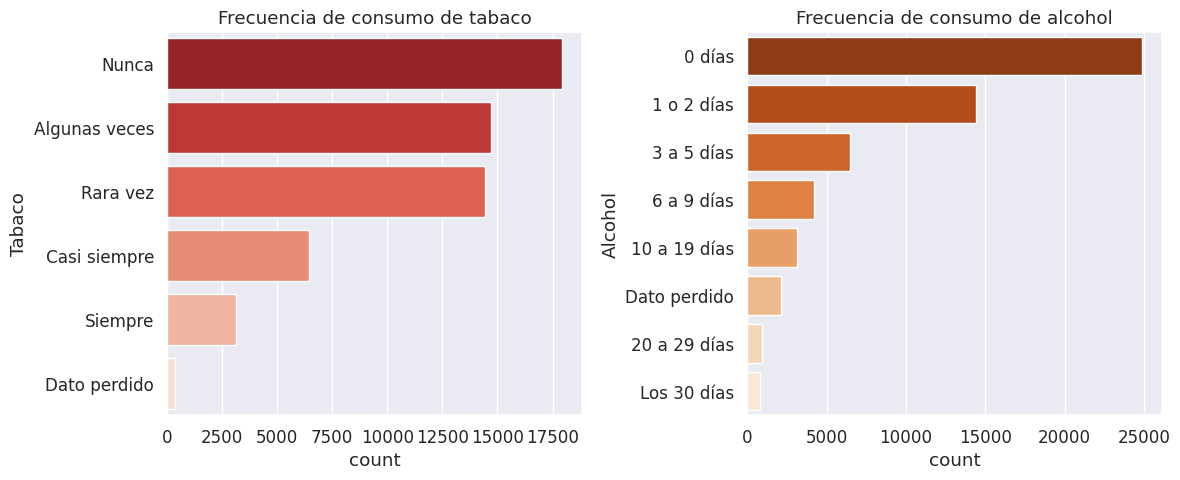

In [42]:
# ============================================
# BLOQUE: Estadística descriptiva y gráficos
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = (8, 5)

# 1. Estadística descriptiva básica
print("Resumen general de las variables categóricas:\n")
for col in df_analisis.columns:
    print(f"{col}: {df_analisis[col].nunique()} categorías | {df_analisis[col].isna().mean():.1%} valores faltantes")
    print("Moda:", df_analisis[col].mode().values[0])
    print("-" * 50)

# 2. Distribución por sexo
sexo_counts = df_analisis['Sexo'].value_counts(normalize=True) * 100
sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette="pastel")
plt.title("Distribución por sexo (%)")
plt.ylabel("Porcentaje")
plt.xlabel("")
plt.show()

# 3. Distribución de edad
edad_counts = df_analisis['Edad'].value_counts().sort_index()
sns.barplot(x=edad_counts.index, y=edad_counts.values, palette="crest")
plt.title("Distribución de edades (en años)")
plt.ylabel("Frecuencia")
plt.xlabel("Edad")
plt.show()

# 4. Nivel educativo de los padres
edu_counts = df_analisis['Educacion_padres'].value_counts().head(6)
sns.barplot(y=edu_counts.index, x=edu_counts.values, palette="flare")
plt.title("Nivel educativo de los padres (principales categorías)")
plt.xlabel("Frecuencia")
plt.ylabel("")
plt.show()

# 5. Hábitos de salud (actividad física y consumo de frutas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_analisis, y='Actividad_fisica', order=df_analisis['Actividad_fisica'].value_counts().index, ax=axes[0], palette="Blues_r")
axes[0].set_title("Frecuencia de actividad física")

sns.countplot(data=df_analisis, y='Consumo_frutas', order=df_analisis['Consumo_frutas'].value_counts().index, ax=axes[1], palette="Greens_r")
axes[1].set_title("Consumo de frutas en los últimos 7 días")

plt.tight_layout()
plt.show()

# 6. Conductas de riesgo (tabaco y alcohol)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df_analisis, y='Tabaco', order=df_analisis['Tabaco'].value_counts().index, ax=axes[0], palette="Reds_r")
axes[0].set_title("Frecuencia de consumo de tabaco")

sns.countplot(data=df_analisis, y='Alcohol', order=df_analisis['Alcohol'].value_counts().index, ax=axes[1], palette="Oranges_r")
axes[1].set_title("Frecuencia de consumo de alcohol")

plt.tight_layout()
plt.show()

# ============================================
# FIN DEL BLOQUE
# ============================================